# SP901 Capstone Project

# 5.3 Final Project

## 5.3.1 Python for Data Science and Machine Learning

Guidelines:
1. Using the dataset provided, create a binary classification
2. Perform the following:
    *  Perform an exploratory analysis (scaling, PCA, unbalanced)
    *  Split the data (train, validation, test)
    *  Perform 10-fold cross-validation and grid search (method of your choice)
    *  Compare the different classification methods
        (Logistic Regression, KNN, SVM, RF, XGBOOST)
    *  Show evaluation metrics (ROC-AUC, accuracy, f-1 score)
    *  Submit the jupyter notebook

### Importing Libraries

In [1]:
#!pip install seaborn

In [2]:
# Importing necessary libraries
# For performing linear algebra or computing
import numpy as np 
 
# For data processing
import pandas as pd
 
# For visualisation
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [3]:
# Load dataset
data = pd.read_csv("C:/Users/mneme/Desktop/SP901_CS_completedata.csv", sep=';')

In [4]:
# Creating a list of Result
compare_classification_methods = []

### Data Preprocessing

In [5]:
# Check for missing values
data.isnull().sum()

PatientID             0
Failure.binary        0
Entropy_cooc.W.ADC    0
GLNU_align.H.PET      0
Min_hist.PET          0
                     ..
GLNU_norm.W.ADC       0
ZSNU_norm.W.ADC       0
GLVAR_area.W.ADC      0
ZSVAR.W.ADC           0
Entropy_area.W.ADC    0
Length: 430, dtype: int64

In [6]:
# Check all column data types
data.dtypes

PatientID               int64
Failure.binary          int64
Entropy_cooc.W.ADC    float64
GLNU_align.H.PET      float64
Min_hist.PET          float64
                       ...   
GLNU_norm.W.ADC       float64
ZSNU_norm.W.ADC       float64
GLVAR_area.W.ADC      float64
ZSVAR.W.ADC           float64
Entropy_area.W.ADC    float64
Length: 430, dtype: object

In [7]:
# Getting some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 430 entries, PatientID to Entropy_area.W.ADC
dtypes: float64(428), int64(2)
memory usage: 661.9 KB


In [8]:
# Check initial data
data.head()

,PatientID,Failure.binary,Entropy_cooc.W.ADC,GLNU_align.H.PET,Min_hist.PET,Max_hist.PET,Mean_hist.PET,Variance_hist.PET,Standard_Deviation_hist.PET,Skewness_hist.PET,...,LZLGE.W.ADC,LZHGE.W.ADC,GLNU_area.W.ADC,ZSNU.W.ADC,ZSP.W.ADC,GLNU_norm.W.ADC,ZSNU_norm.W.ADC,GLVAR_area.W.ADC,ZSVAR.W.ADC,Entropy_area.W.ADC
0,1,0,12.85352,46.256345,6.249117,17.825541,9.783773,6.814365,2.612479,0.688533,...,0.00690,6201.93480,4.13400,239.28938,0.97918,0.01899,0.95586,1145.10496,0.02586,6.28632
1,2,1,12.21115,27.454540,11.005214,26.469077,15.426640,12.932074,3.598298,0.789526,...,0.00423,16054.01263,8.37627,644.73702,0.95637,0.01461,0.93288,847.52537,0.04153,6.77853
2,3,0,12.75682,90.195696,2.777718,6.877486,4.295330,0.923425,0.962163,0.248637,...,0.00453,6674.63840,13.11686,1165.70261,0.97268,0.02501,0.91537,1923.85705,0.07104,7.15685
3,4,1,13.46730,325.643330,6.296588,22.029843,10.334779,6.649795,2.580759,0.832011,...,0.00888,17172.90951,23.84726,2760.41293,0.97203,0.01069,0.94658,1329.95290,0.03848,7.29521
4,5,0,12.63733,89.579042,3.583846,7.922501,4.454175,0.572094,0.757225,1.574845,...,0.00405,13231.94294,8.14437,784.59729,0.96469,0.02526,0.93769,1116.38669,0.05223,7.05149


In [9]:
# We drop PatientID cause it is not relevant feature to our analysis 
columns_to_drop = ['PatientID']
data = data.drop(columns=columns_to_drop)
data.shape

(197, 429)

In [10]:
# Basic summary statistics
data.describe()

,Failure.binary,Entropy_cooc.W.ADC,GLNU_align.H.PET,Min_hist.PET,Max_hist.PET,Mean_hist.PET,Variance_hist.PET,Standard_Deviation_hist.PET,Skewness_hist.PET,Kurtosis_hist.PET,...,LZLGE.W.ADC,LZHGE.W.ADC,GLNU_area.W.ADC,ZSNU.W.ADC,ZSP.W.ADC,GLNU_norm.W.ADC,ZSNU_norm.W.ADC,GLVAR_area.W.ADC,ZSVAR.W.ADC,Entropy_area.W.ADC
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,...,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.340102,12.278600,95.381938,8.513255,24.271413,13.008133,9.257452,3.049220,0.911980,0.490932,...,0.006405,13333.581481,40.154389,3334.075705,1.193836,0.016572,1.157634,1114.711636,0.065497,8.507117
std,0.474950,1.039816,86.089059,4.985543,14.779666,7.668180,9.303475,1.848637,0.691920,3.041625,...,0.032306,9140.346577,52.092487,4751.131998,0.423532,0.031414,0.412787,755.908819,0.056252,2.995206
min,0.000000,9.532740,9.445031,1.484508,4.164474,2.424636,0.178752,0.419449,-0.001136,-2.266122,...,-0.062616,1369.130190,2.015900,84.039160,0.851807,-0.054262,0.792028,253.629375,-0.029824,5.585010
25%,0.000000,11.558840,37.518193,5.151990,13.071684,7.497794,2.258260,1.639108,0.444828,-0.525860,...,-0.011160,6881.763841,9.340283,741.277380,0.945840,0.001476,0.908540,564.917867,0.031800,6.626250
50%,0.000000,12.278790,80.034684,7.388754,21.013614,11.449486,6.450421,2.734120,0.734796,-0.167186,...,0.009070,11685.594830,20.363374,1479.035520,0.966065,0.018532,0.938043,983.073750,0.055972,7.025632
75%,1.000000,12.977330,112.145185,11.005214,33.761142,17.386702,12.682440,4.209453,1.199956,0.501737,...,0.021579,17172.909510,48.480280,3976.605794,1.797414,0.033476,1.677856,1295.180470,0.091940,11.170020
max,1.000000,14.510471,559.351571,28.404496,79.985858,44.043168,49.012054,9.929300,4.901172,33.742118,...,0.136980,51885.362160,387.348504,35037.698160,1.980520,0.086040,2.007120,4306.766300,0.318752,15.380880


C:\Users\mneme\AppData\Local\Temp\ipykernel_13148\1752128107.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], kde=True)
C:\Users\mneme\AppData\Local\Temp\ipykernel_13148\1752128107.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], kde=True)
C:\Users\mneme\AppData\Loc

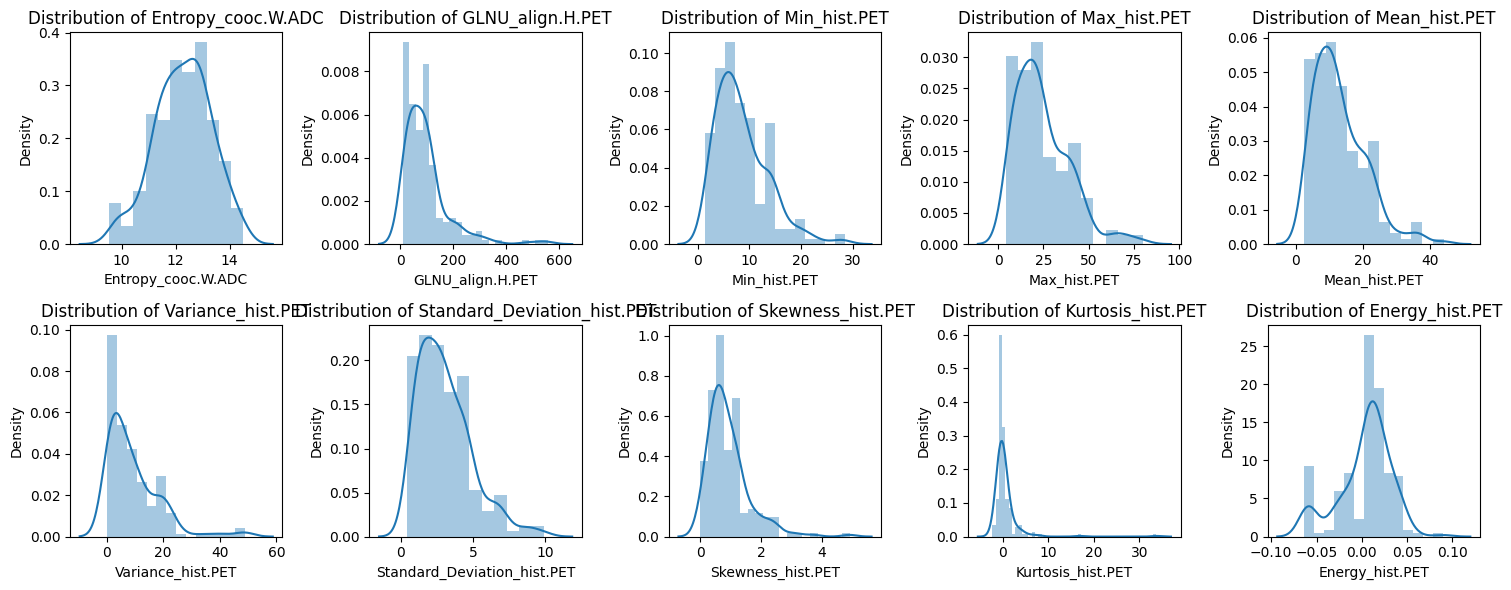

In [11]:
# Univariate Analysis
# Histogram of All Features
# Exclude the first column ['Failure.binary'] since its a binary
columns = data.columns[1:]  

# Visualize the first columns
for i in range(0, 10, 10):
    plt.figure(figsize=(15, 6))
    subset = columns[i:i+10]
    for idx, col in enumerate(subset):
        plt.subplot(2, 5, idx + 1)
        sns.distplot(data[col], kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

Based on the statistics and the distplot above, the dataset has a lot of outlier

#### Outlier Removal

In [12]:
# Defining a Z-score threshold
threshold = 3

# Calculate Z-scores for each column in the DataFrame
z_scores = np.abs((data - data.mean()) / data.std())

# Filter data based on the threshold
data = data[(z_scores < threshold).all(axis=1)]
print(data.shape)
data.describe()

(118, 429)


,Failure.binary,Entropy_cooc.W.ADC,GLNU_align.H.PET,Min_hist.PET,Max_hist.PET,Mean_hist.PET,Variance_hist.PET,Standard_Deviation_hist.PET,Skewness_hist.PET,Kurtosis_hist.PET,...,LZLGE.W.ADC,LZHGE.W.ADC,GLNU_area.W.ADC,ZSNU.W.ADC,ZSP.W.ADC,GLNU_norm.W.ADC,ZSNU_norm.W.ADC,GLVAR_area.W.ADC,ZSVAR.W.ADC,Entropy_area.W.ADC
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,...,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,0.330508,12.265963,85.673275,7.657145,20.798990,11.633292,8.083566,2.650078,0.724525,0.085722,...,-0.000452,10673.274099,27.851352,2233.416167,1.006545,0.009333,0.974908,882.389337,0.049369,7.183618
std,0.472402,0.948230,65.624263,3.753674,10.194541,5.773281,6.595905,1.295172,0.413204,0.953426,...,0.028094,6044.745330,27.037457,2320.619464,0.237401,0.027976,0.232854,476.807263,0.040516,1.637960
min,0.000000,9.780640,13.658399,2.063546,4.481790,3.108424,0.346084,0.590950,-0.000568,-1.427184,...,-0.061976,1369.130190,2.374870,91.949230,0.851807,-0.054262,0.792028,253.629375,-0.029824,5.585010
25%,0.000000,11.660185,32.735897,4.446142,12.999408,6.256104,2.344858,1.535263,0.390722,-0.437610,...,-0.013075,6010.911250,9.340808,742.929782,0.934242,-0.000229,0.896453,488.975665,0.024300,6.455271
50%,0.000000,12.270140,68.043387,6.888983,20.360035,11.041045,6.673200,2.662501,0.683343,-0.152004,...,0.005505,9699.487420,18.461570,1336.865905,0.956414,0.013600,0.929805,863.279430,0.052332,6.870535
75%,1.000000,12.966412,113.313845,9.871236,26.018870,14.989738,11.419836,3.389477,0.987212,0.327711,...,0.016723,15205.102667,38.341445,3146.816648,0.971985,0.025260,0.946588,1134.343272,0.067544,7.131410
max,1.000000,14.465471,325.643330,16.983672,42.966732,27.033122,24.046560,6.962134,1.951428,4.065725,...,0.068490,32610.285360,193.674252,15648.256480,1.969320,0.073456,1.915760,2743.237630,0.164320,14.610520


C:\Users\mneme\AppData\Local\Temp\ipykernel_13148\3666887049.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], kde=True)
C:\Users\mneme\AppData\Local\Temp\ipykernel_13148\3666887049.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], kde=True)
C:\Users\mneme\AppData\Loc

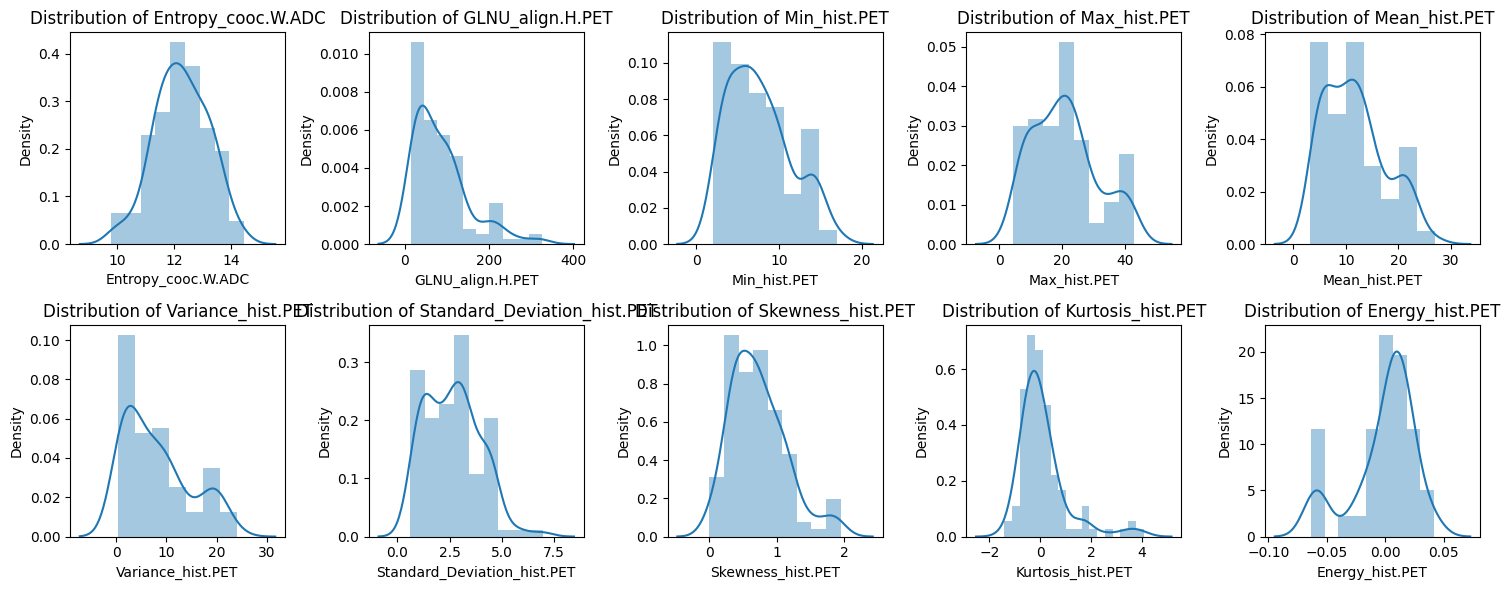

In [13]:
# Histogram of All Features after Removal of Outlier
# Exclude the first column ['Failure.binary'] since its a binary
columns = data.columns[1:]  

# Visualize the first 10 columns 
for i in range(0, 10, 10):
    plt.figure(figsize=(15, 6))
    subset = columns[i:i+10]
    for idx, col in enumerate(subset):
        plt.subplot(2, 5, idx + 1)
        sns.distplot(data[col], kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

#### Imbalance Dataset

In [14]:
# Check class distribution
class_distribution = data['Failure.binary'].value_counts()
print(class_distribution)

Failure.binary
0    79
1    39
Name: count, dtype: int64


In [15]:
import sklearn
print(sklearn.__version__)

1.3.2


In [16]:
# Splitting data to Independent and Dependent Variable (Target)
X = data.drop('Failure.binary', axis=1)  
y = data['Failure.binary'] # 'Failure.binary' is the target

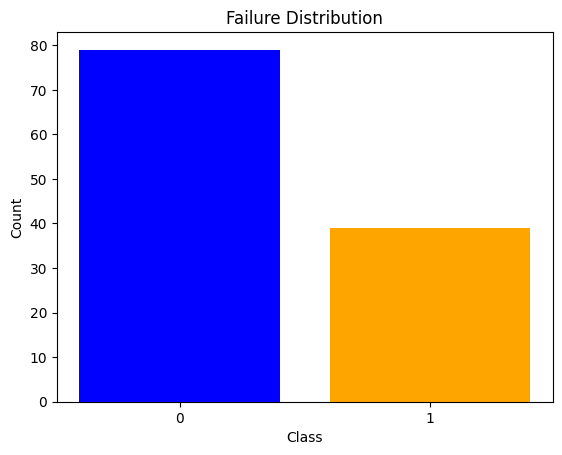

In [17]:
import matplotlib.pyplot as plt

plt.bar(['0', '1'], class_distribution, color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Failure Distribution')
plt.show()

The distribution shows that there is an imbalance on our dataset. We will have a problem if we used it especially when we will be using 10 fold cross-validation that requires a lot of data as well as on the grid search. It also can affect our model performance.

#### SMOTE for Handling Imbalance Dataset

In [18]:
# Installing imbalanced learn
# It is an old version to make sure that it is compatible to my system
# You may upgrade to the latest version
#!pip install imbalanced-learn==0.11.0 --user

In [19]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Show the class distribution before applying SMOTE
print("Before SMOTE:", Counter(y))

# SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(X, y)

# Show the class distribution after applying SMOTE
print("After SMOTE:", Counter(y))

Before SMOTE: Counter({0: 79, 1: 39})
After SMOTE: Counter({0: 79, 1: 79})


We use SMOTE to deal with imbalance on our minority class. Now, we have a balanced dataset. We could now start our analysis.

### Exploratory Data Analysis

#### Scaling using StandardScaler

In [20]:
# We will scale our data using standardscaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
data_scaled = scaler.fit_transform(X)

# Convert scaled data arrays back to dataframes
data_scaled_df = pd.DataFrame(data_scaled, columns=X.columns)
data_scaled_df.shape

(158, 428)

#### Dimension Reduction

A dataset with samples (rows) < features (columns), it qualifies as a high-dimensional dataset requiring dimensionality reduction. There are lots of methods but our plan is to employ either PCA or RFE methods for this project. 

##### Sctterplot Diagram of 2 PCA Selected Components and 2 RFE Selected Features 

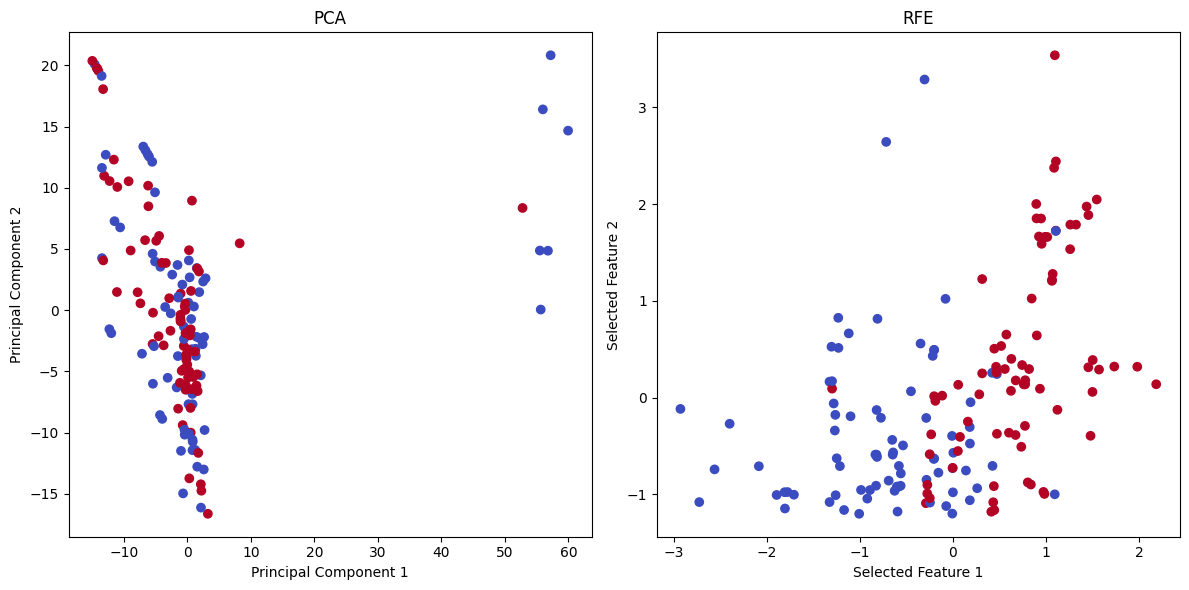

In [21]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Apply PCA for dimensionality reduction to 30 components
pca = PCA(n_components=30)
X_pca = pca.fit_transform(data_scaled_df)

# Apply RFE for dimensionality reduction to 30 features
model = LogisticRegression(solver='liblinear', random_state = 42, max_iter = 1000)
rfe = RFE(model, n_features_to_select=30)
X_rfe = rfe.fit_transform(data_scaled_df, y)

# Visualize PCA
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("PCA")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Visualize RFE
plt.subplot(1, 2, 2)
plt.title("RFE")
plt.scatter(X_rfe[:, 0], X_rfe[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Selected Feature 1')
plt.ylabel('Selected Feature 2')

plt.tight_layout()
plt.show()


##### Variance of PCA Selected Components

In [22]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=30)
pca.fit(data_scaled_df)
reduced_data = pca.transform(data_scaled_df)

# Analyze results - For example, print the explained variance ratio
#print("Explained variance ratio:", pca.explained_variance_ratio_)

total_variance_sklearn = np.sum(pca.explained_variance_ratio_)
print("Total variance explained (using sklearn PCA):", total_variance_sklearn)
# Perform further analysis or visualization with 'reduced_data'

num_components = 30  # Number of principal components you want to include
# Create a DataFrame from the reduced data
reduced_df = pd.DataFrame(data=reduced_data[:, :num_components], columns=[f'PC{i}' for i in range(1, num_components + 1)])

Total variance explained (using sklearn PCA): 0.9871592909127158


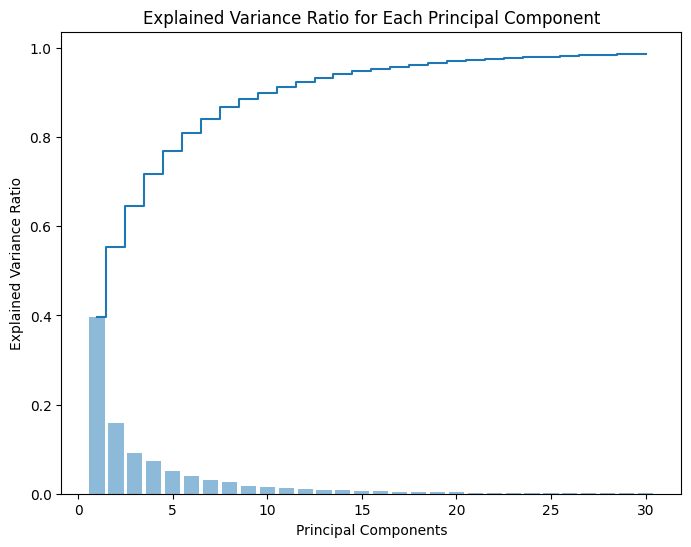

In [23]:
explained_var_ratio = pca.explained_variance_ratio_

# Plotting the explained variance ratios
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_var_ratio) + 1), explained_var_ratio, alpha=0.5, align='center')
plt.step(range(1, len(explained_var_ratio) + 1), np.cumsum(explained_var_ratio), where='mid')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

The analysis demonstrates that by utilizing 30 features, we can encompass 98.7% of the dataset. Therefore, our project will operate with these 30 selected features.

Checking PCA performance

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(reduced_df, y, stratify=y, test_size=0.3, random_state=42)

logreg = LogisticRegression(solver='liblinear', random_state = 42, max_iter = 1000)
print("PCA Accuracy: {} ".format(logreg.fit(data_scaled_df, y).score(data_scaled_df, y)))

PCA Accuracy: 0.9810126582278481 


#### Feature Selection using RFE

In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logreg = LogisticRegression(solver='liblinear', random_state = 42, max_iter = 1000)

# Initialize RFE with logistic regression as the estimator
# Set the number of features you want to select (e.g., 5 in this case)
num_features_to_select = 30
rfe = RFE(estimator=logreg, n_features_to_select=num_features_to_select)

# Fit RFE to the scaled features
rfe.fit(data_scaled_df, y)

# Get the selected feature indices
selected_features_indices = rfe.get_support(indices=True)

# Filter the original feature names to retain only the selected features
selected_feature_names = data_scaled_df.columns[selected_features_indices]

# Transform scaled data with selected features back to DataFrame
selected_features = data_scaled_df.iloc[:, selected_features_indices]

# Create a DataFrame with only the selected features
selected_features_df = pd.DataFrame(selected_features, columns=selected_feature_names)


Checking RFE perforance

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(selected_features_df, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(solver='liblinear', random_state = 42, max_iter = 1000)
print("RFE Accuracy: {} ".format(logreg.fit(data_scaled_df, y).score(data_scaled_df, y)))

RFE Accuracy: 0.9810126582278481 


Both methods perform well. In this project, we will opt for the RFE method.

#### Split the Data to Training, Test and Validation Set

In [27]:
from sklearn.model_selection import train_test_split

# Our data is in X (features) and y (target)
# Splitting the data into 70% training and 30% test + validation combined
X_train, X_temp, y_train, y_temp = train_test_split(selected_features_df, y, test_size=0.3, random_state=42)

# Splitting the remaining 30% into equal parts for test (50%) and validation (50%)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")
print(f"Validation set size: {len(X_val)} samples")

Training set size: 110 samples
Test set size: 24 samples
Validation set size: 24 samples


## Binary Classification

### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
logistic_regression = LogisticRegression()

# Define a grid of hyperparameters to search (example hyperparameters, adjust as needed)
param_grid = {
    'C': [0.1, 1.0, 10.0],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs']  # Solver options
}

#### GridSearch with 10-Fold Cross Vaidation for optimization of Logistic Regression Model

In [29]:
from sklearn.model_selection import GridSearchCV, cross_val_score
# Create a GridSearchCV object with the logistic regression model and parameter grid
grid_search = GridSearchCV(logistic_regression, param_grid, cv=10, scoring='accuracy')

# Fit the model on the training data to find the best hyperparameters
grid_search.fit(X_val, y_val)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10.0],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [30]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Train Best Parameters:", best_params)
print("Train Accuracy:", best_score)

Train Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Train Accuracy: 0.95


In [31]:
best_model = grid_search.best_estimator_
print("Train model:", best_model)

Train model: LogisticRegression(C=0.1, solver='liblinear')


In [32]:
best_model.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [33]:
# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_model, X_val, y_val, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [1.  1.  1.  1.  1.  1.  1.  1.  1.  0.5]
Mean cross-validation score: 0.95


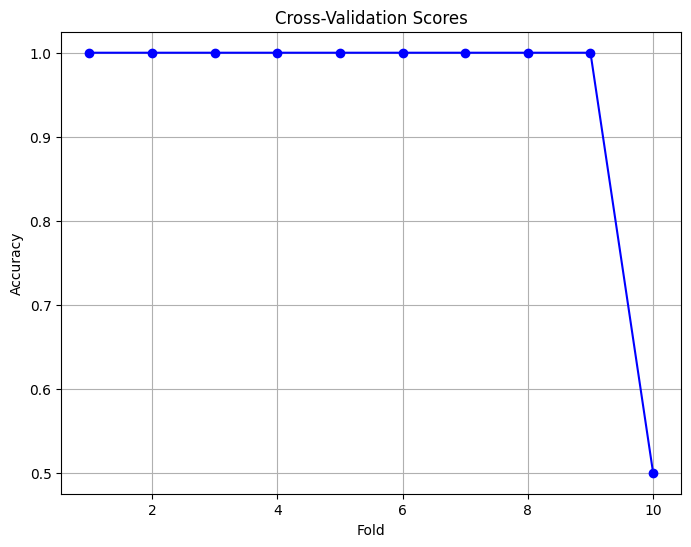

In [34]:
# Assuming cv_scores contains the cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

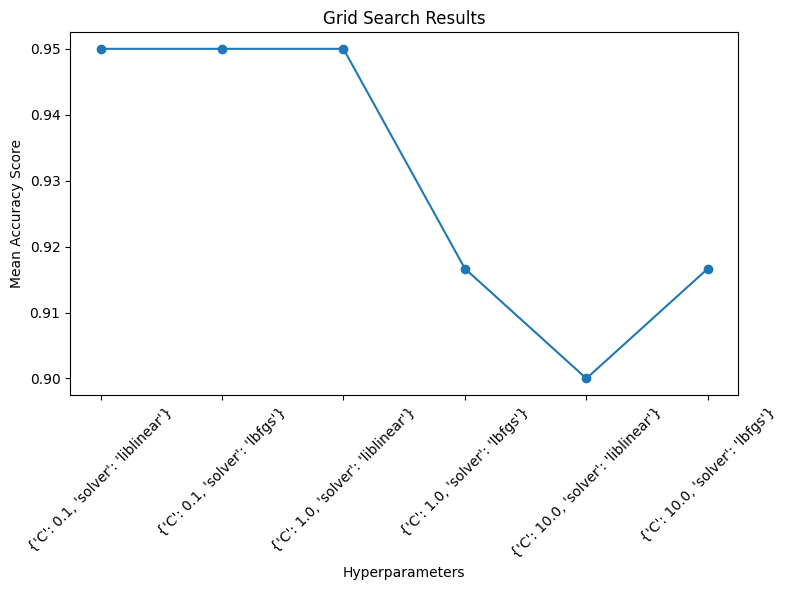

In [35]:
mean_scores = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']

plt.figure(figsize=(8, 6))
plt.plot(range(len(mean_scores)), mean_scores, marker='o')
plt.xticks(range(len(mean_scores)), [str(p) for p in params], rotation=45)
plt.xlabel('Hyperparameters')
plt.ylabel('Mean Accuracy Score')
plt.title('Grid Search Results')
plt.tight_layout()
plt.show()

#### Evaluation of Logistic Regression Model using ROC-AUC and F1 Score  

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score

In [37]:
# Predict probabilities for the test set
y_probs = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC: {roc_auc:.4f}")

ROC-AUC: 0.8811


In [38]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.8800


In [39]:
# Make predictions on the test set
y_pred_ = best_model.predict(X_test)

# Calculate Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.8750


In [40]:
compare_classification_methods.append({
        'Classification Method': "Logistic Regression",
        'Train Accuracy': best_score,
        'Test Accuracy': accuracy,
        'ROC-AUC Score': roc_auc,
        'F1 Score': f1
    })

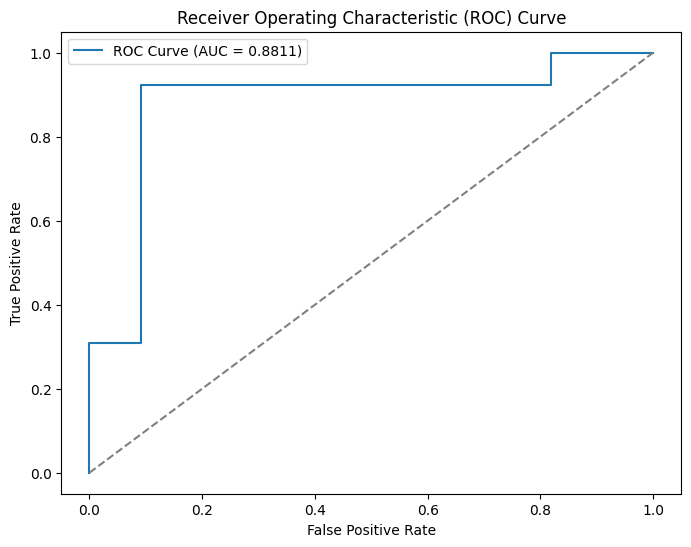

In [41]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Logistic Regression model demonstrates a high accuracy during training (95%) but slightly lower accuracy during testing (75%). It shows a good overall performance but might be overfitting the data.

### K Nearest Neighbors

#### GridSearch with 10-Fold Cross Vaidation for optimization of K-Nearest Neighbors Model

In [42]:
from sklearn.neighbors import KNeighborsClassifier

# Define the knn model
knn = KNeighborsClassifier()

# Define a grid of hyperparameters to search (e.g., different values of k)
param_grid = {'n_neighbors': np.arange(1, 15)}

# Perform grid search with 10-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_val, y_val)

# Get the best parameters
best_k = grid_search.best_params_['n_neighbors']

# Train the k-NN model using the best parameters
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Show the best hyperparameters and corresponding accuracy
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate Train Accuracy
train_accuracy = knn.fit(X_train, y_train).score(X_train, y_train)
print("Train accuracy: {} ".format(train_accuracy))

Best hyperparameters: {'n_neighbors': 5}
Train accuracy: 0.8727272727272727 


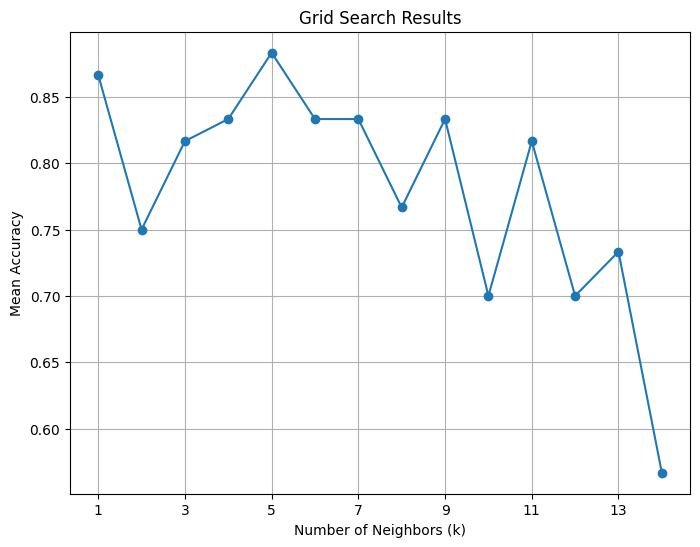

In [43]:
# Extract grid search results
mean_scores = grid_search.cv_results_['mean_test_score']
k_values = np.arange(1, 15)

# Plot the grid search results
plt.figure(figsize=(8, 6))
plt.plot(k_values, mean_scores, marker='o', linestyle='-')
plt.title('Grid Search Results')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.xticks(np.arange(1, 15, 2))
plt.grid(True)
plt.show()

#### Evaluation of K-Nearest Neighbors Model using ROC-AUC and F1 Score  

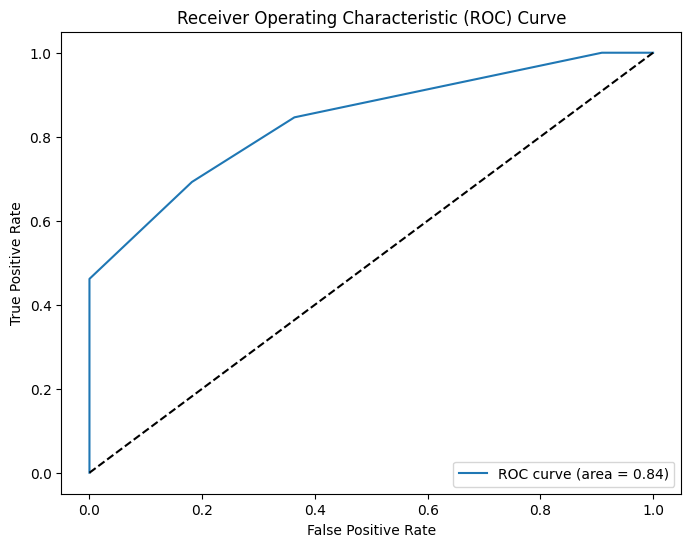

ROC-AUC: 0.8391608391608391
F1 Score: 0.7692307692307693
Accuracy Score: 0.7500


In [44]:
# Predict probabilities for positive class
y_probs = best_knn.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_probs)

# Calculate F1 score
y_pred = best_knn.predict(X_test)
f1 = f1_score(y_test, y_pred)

# Tabulate Result
compare_classification_methods.append({
        'Classification Method': "K-Nearest Neighbors",
        'Train Accuracy': train_accuracy,
        'Test Accuracy': accuracy,
        'ROC-AUC Score': roc_auc,
        'F1 Score': f1
    })

# Get ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"ROC-AUC: {roc_auc}")
print(f"F1 Score: {f1}")


# Calculate Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")


K-Nearest Neighbors (KNN) model has a lower accuracy during training (87%) compared to other models, yet it shows similar accuracy during testing (75%). KNN might be simpler but lacks the robustness of other models.

### Support Vector Machines

#### GridSearch with 10-Fold Cross Vaidation for optimization of Support Vector Machines Model

In [45]:
from sklearn.svm import SVC

# Define the SVM model
svm = SVC()

# Define the parameters grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [10, 1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_val, y_val)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_svm = SVC(**best_params)
best_svm.fit(X_train, y_train)

# Calculate train accuracy using the best model
train_accuracy = best_svm.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Training Accuracy: 1.0


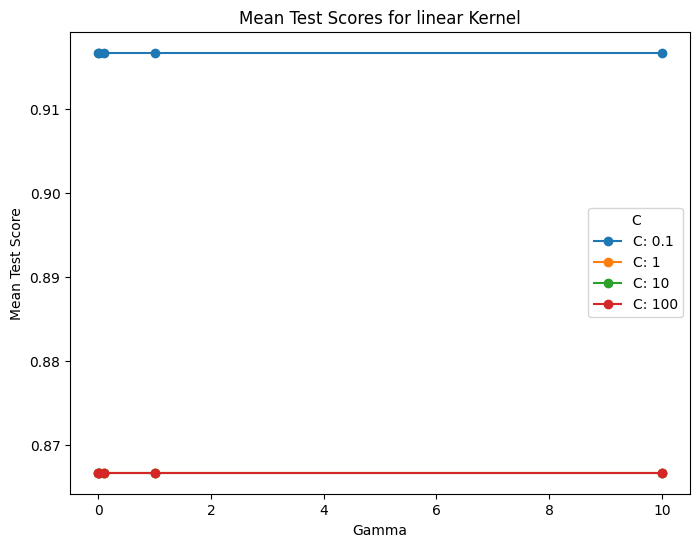

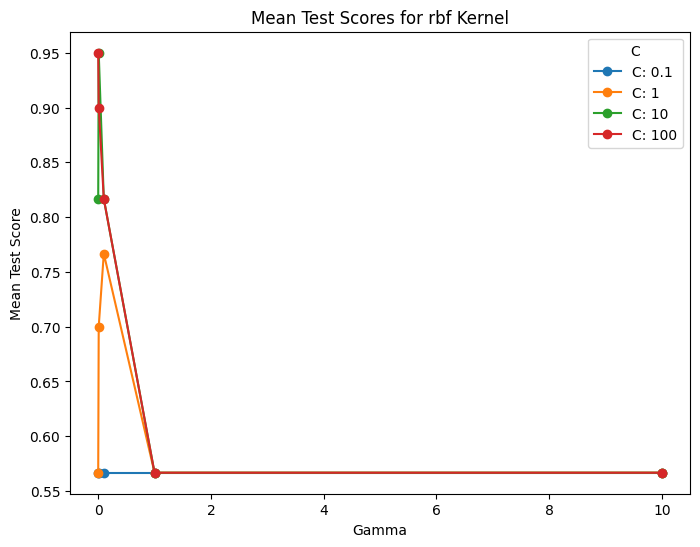

In [46]:
# Reshape results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Plotting mean test scores against hyperparameters
for kernel in param_grid['kernel']:
    kernel_results = results[results['param_kernel'] == kernel]

    plt.figure(figsize=(8, 6))
    for i, val in enumerate(param_grid['C']):
        plt.plot(
            kernel_results[kernel_results['param_C'] == val]['param_gamma'],
            kernel_results[kernel_results['param_C'] == val]['mean_test_score'],
            marker='o',
            label=f'C: {val}'
        )

    plt.title(f'Mean Test Scores for {kernel} Kernel')
    plt.xlabel('Gamma')
    plt.ylabel('Mean Test Score')
    plt.legend(title='C')
    plt.show()

#### Evaluation of Support Vector Machines Model using ROC-AUC and F1 Score  

Accuracy Score: 0.8750


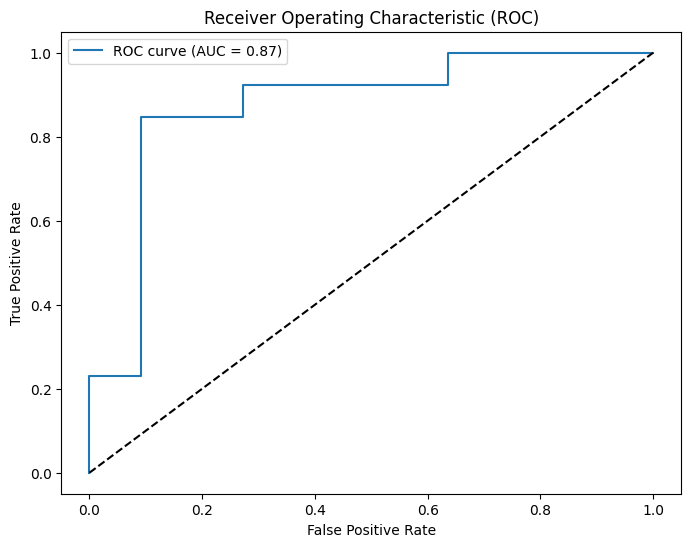

ROC AUC: 0.8741
F1 Score: 0.8800


In [47]:
# Get predicted probabilities for the positive class
y_pred_prob = best_svm.decision_function(X_test)

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# F1 score
y_pred = best_svm.predict(X_test)
f1 = f1_score(y_test, y_pred)

# Calculate Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Tabulate Result
compare_classification_methods.append({
        'Classification Method': "Support Vector Machines",
        'Train Accuracy': train_accuracy,
        'Test Accuracy': accuracy,
        'ROC-AUC Score': roc_auc,
        'F1 Score': f1
    })

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()

print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")



Support Vector Machines (SVM) model have a perfect accuracy during training (100%) and good accuracy during testing (87.5%). This indicates a strong ability to learn patterns in the data and generalize well to new, unseen data.

### Random Forest

#### GridSearch with 10-Fold Cross Vaidation for optimization of Random Forest Model

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Define the hyperparameters grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search with 10-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_val, y_val)

# Get the best parameters
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

# Train the model using the best parameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

# Calculate the training accuracy
train_accuracy = best_rf.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Training Accuracy: 1.0


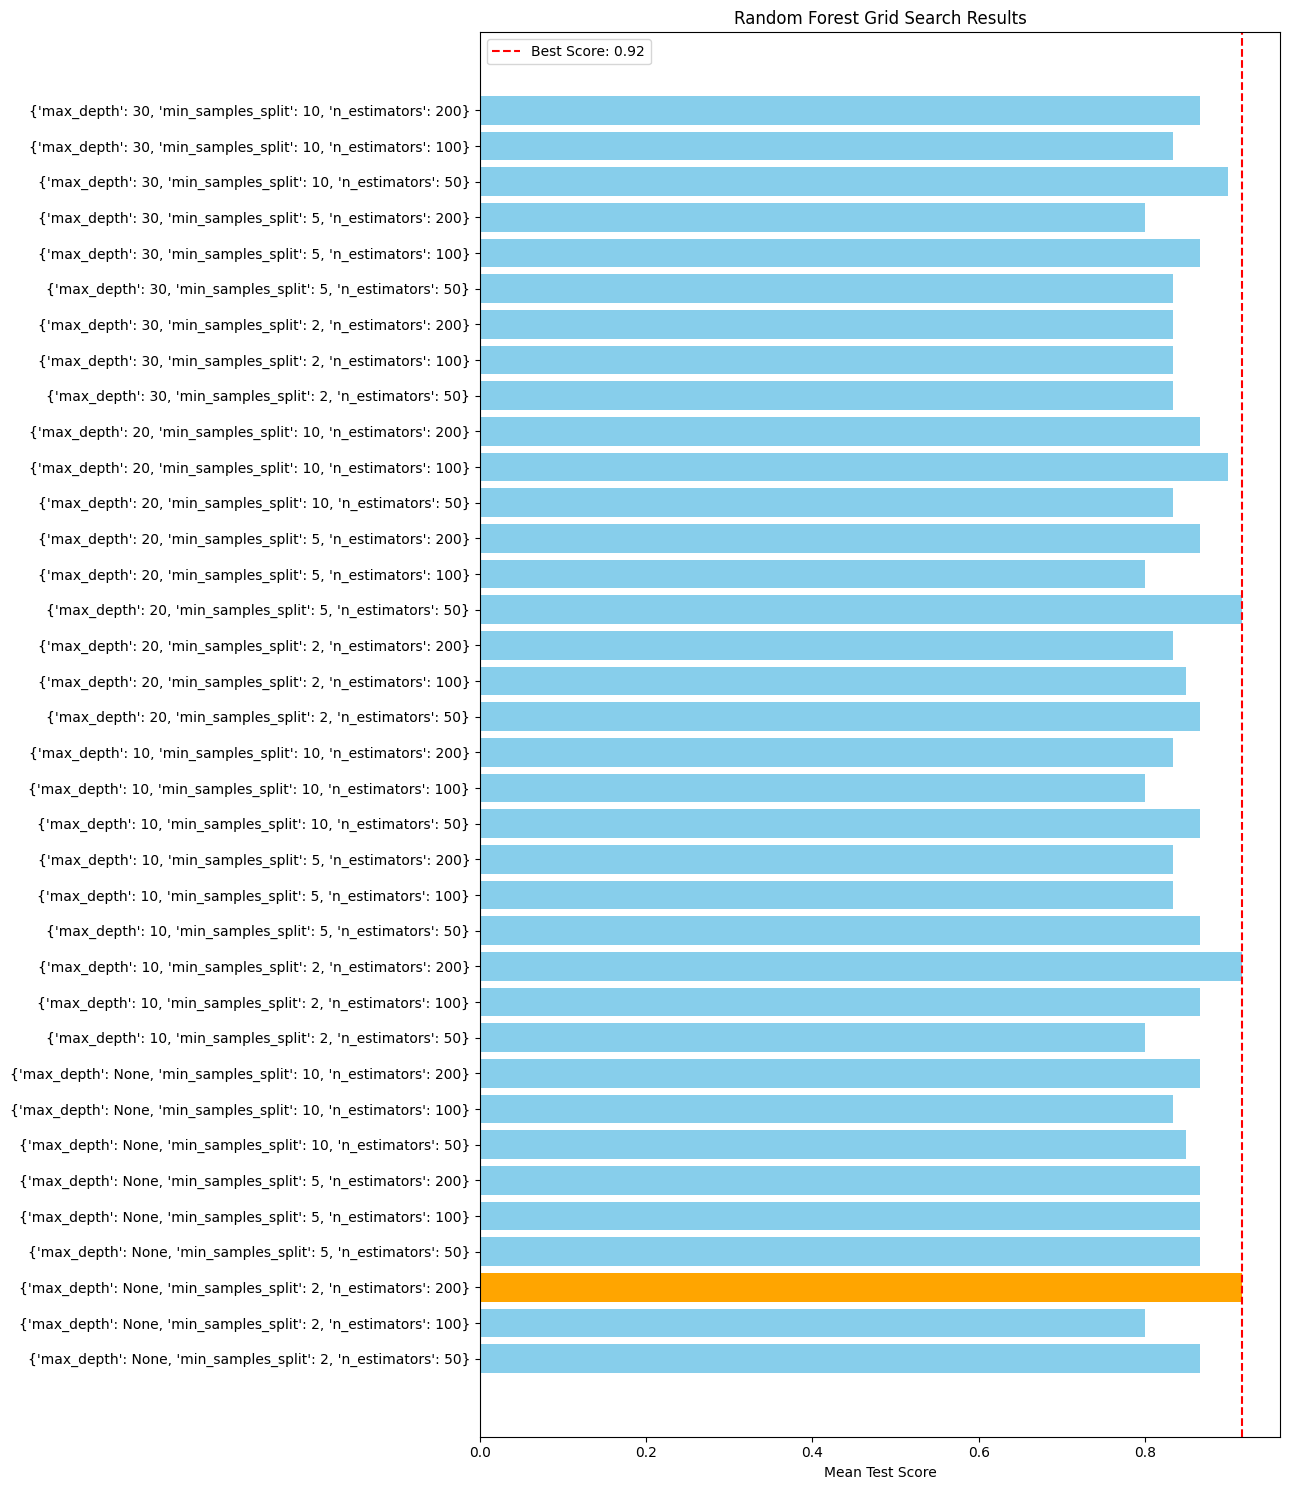

In [49]:
# Extract scores and parameters from the grid search results
scores = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']

# Get the parameter combinations tested
param_combinations = [str(param) for param in params]

# Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Plotting the scores for different parameter combinations
plt.figure(figsize=(13, 15))
plt.barh(param_combinations, scores, color='skyblue')

# Highlight the bar for the best parameter combination
for i, param in enumerate(param_combinations):
    if params[i] == best_params:
        plt.barh(param, scores[i], color='orange')

plt.xlabel('Mean Test Score')
plt.title('Random Forest Grid Search Results')
plt.axvline(x=best_score, color='red', linestyle='--', label='Best Score: {:.2f}'.format(best_score))
plt.legend()
plt.tight_layout()
plt.show()

#### Evaluation of Random Forest Model using ROC-AUC and F1 Score  

ROC AUC Score: 0.8986013986013985
F1 Score: 0.8799999999999999
Accuracy: 0.875


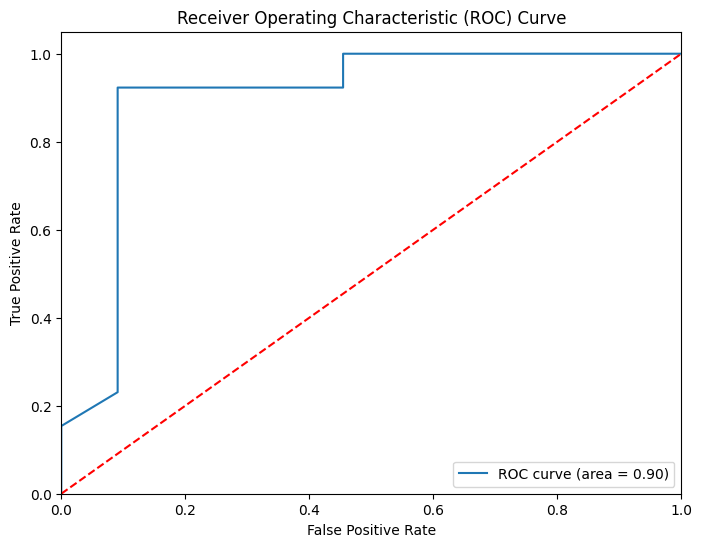

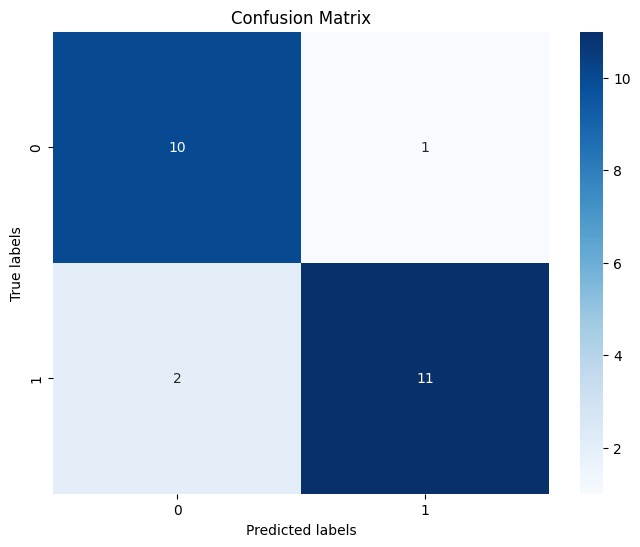

In [50]:
from sklearn.metrics import confusion_matrix
# Calculate ROC-AUC score
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

# Calculate F1 score
y_pred = best_rf.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


# Calculate Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Tabulate Result
compare_classification_methods.append({
        'Classification Method': "Random Forest",
        'Train Accuracy': train_accuracy,
        'Test Accuracy': accuracy,
        'ROC-AUC Score': roc_auc,
        'F1 Score': f1
    })

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

The model display perfect accuracy during training (100%) and high accuracy during testing (91.67%). These models show promising results, indicating strong predictive capabilities and generalization to new data.

### Extreme Gradient Boosting

In [51]:
# Instaling XGBoost package library
#!pip install xgboost

#### GridSearch with 10-Fold Cross Vaidation for optimization of Extreme Gradient Boosting Model

In [52]:
import xgboost as xgb

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Perform grid search with 10-fold cross-validation
grid_search = GridSearchCV(xgb_model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_val, y_val)

# Show best parameters
print("Best parameters found: ", grid_search.best_params_)

# Train the model with the best parameters
best_xgb = xgb.XGBClassifier(**grid_search.best_params_)
best_xgb.fit(X_train, y_train)

# Get the training accuracy
train_accuracy = best_xgb.score(X_train, y_train)
print("Training accuracy: {:.2f}%".format(train_accuracy * 100))

# You can also get cross-validation scores
cross_val_scores = cross_val_score(best_xgb, X_train, y_train, cv=10)
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation accuracy: {:.2f}%".format(cross_val_scores.mean() * 100))

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Training accuracy: 100.00%
Cross-validation scores: [1.         0.54545455 0.90909091 1.         1.         0.81818182
 0.81818182 1.         0.81818182 0.90909091]
Mean cross-validation accuracy: 88.18%


#### Evaluation of Extreme Gradient Boosting Model using ROC-AUC and F1 Score  

In [53]:
# Get the predicted probabilities for the positive class
y_pred = best_xgb.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate F1 score
y_pred_binary = best_xgb.predict(X_test)
f1 = f1_score(y_test, y_pred_binary)

print("ROC-AUC:", roc_auc)
print("F1 Score:", f1)

# Calculate Accuracy score
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Tabulate Result
compare_classification_methods.append({
        'Classification Method': "Extreme Gradient Boosting",
        'Train Accuracy': train_accuracy,
        'Test Accuracy': accuracy,
        'ROC-AUC Score': roc_auc,
        'F1 Score': f1
    })

ROC-AUC: 0.8951048951048951
F1 Score: 0.9230769230769231
Accuracy: 0.9166666666666666


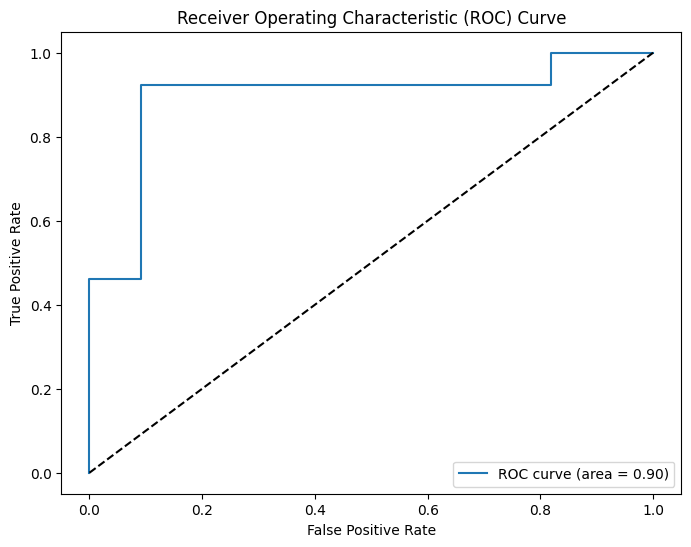

In [54]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The model display perfect accuracy during training (100%) and high accuracy during testing (91.67%). These models show promising results, indicating strong predictive capabilities and generalization to new data.

## Summary

In [55]:
# Result Tabulation 
comparison = pd.DataFrame(compare_classification_methods)
comparison.head()

,Classification Method,Train Accuracy,Test Accuracy,ROC-AUC Score,F1 Score
0,Logistic Regression,0.950000,0.875000,0.881119,0.880000
1,K-Nearest Neighbors,0.872727,0.875000,0.839161,0.769231
2,Support Vector Machines,1.000000,0.875000,0.874126,0.880000
3,Random Forest,1.000000,0.875000,0.898601,0.880000
4,Extreme Gradient Boosting,1.000000,0.916667,0.895105,0.923077


In summary, among the models, Support Vector Machines, Random Forest, and Extreme Gradient Boosting (XGBoost) stand out. They all achieved high training accuracy, good test accuracy, and strong ROC-AUC and F1 scores. Logistic Regression and K-Nearest Neighbors have slightly lower performance, with decent test accuracy but less robust ROC-AUC and F1 scores. The choice of the best method depends on your specific goals and the trade-offs you are willing to make between training and testing performance.